In [4]:
import pandas as pd

fees = pd.read_csv(<filepath>)

In [5]:
# Get the shape of the df
num_rows = fees.shape[0]

# Print the number of rows
print("Number of rows:", num_rows)

# Get the column names and data types
column_info = fees.dtypes

# Print the column names, data types, and number of NAs
print("Column names, data types, and number of NAs:")
for column_name, dtype in column_info.items():
    num_nas = fees[column_name].isna().sum()  # Count the number of NAs in each column
    print(f"{column_name}: {dtype}, NAs: {num_nas}")

Number of rows: 56
Column names, data types, and number of NAs:
Date: object, NAs: 0
Basic maintenance fee: float64, NAs: 0
Electric: float64, NAs: 0
HVAC: int64, NAs: 0
Total maintenance fee: float64, NAs: 0
Unnamed: 5: float64, NAs: 56


In [6]:
# Convert the 'Date' column to datetime data type
fees['Date'] = pd.to_datetime(fees['Date'])

# Now, 'Date' column is converted to datetime data type
print(fees.info())  # Check the data types of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   56 non-null     datetime64[ns]
 1   Basic maintenance fee  56 non-null     float64       
 2   Electric               56 non-null     float64       
 3   HVAC                   56 non-null     int64         
 4   Total maintenance fee  56 non-null     float64       
 5   Unnamed: 5             0 non-null      float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 2.8 KB
None


In [7]:
# Display the first 10 rows
print(fees.head(10))

        Date  Basic maintenance fee  Electric  HVAC  Total maintenance fee  \
0 2019-10-01                 550.35     15.81    51                 617.16   
1 2019-11-01                 550.35      5.14    51                 606.49   
2 2019-12-01                 550.35     11.65    51                 613.00   
3 2020-01-01                 550.35     10.66    51                 612.01   
4 2020-02-01                 550.35      9.58    51                 610.93   
5 2020-03-01                 550.35     12.59    51                 613.94   
6 2020-04-01                 550.35     11.52    51                 612.87   
7 2020-05-01                 550.35      8.73    51                 610.08   
8 2020-06-01                 550.35      9.58    51                 610.93   
9 2020-07-01                 555.85     17.18    51                 624.06   

   Unnamed: 5  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
5         NaN  
6         NaN  
7         NaN

In [8]:
# Display the last 10 rows
print(fees.tail(10))

         Date  Basic maintenance fee  Electric  HVAC  Total maintenance fee  \
46 2023-08-01                 573.72     16.79    51                 641.51   
47 2023-09-01                 573.72     39.62    51                 664.34   
48 2023-10-01                 573.72     31.56    51                 656.28   
49 2023-11-01                 573.72     24.18    51                 648.90   
50 2023-12-01                 573.72     34.32    51                 659.04   
51 2024-01-01                 573.72     26.74    51                 651.46   
52 2024-02-01                 573.72     28.24    51                 652.96   
53 2024-03-01                 573.72     28.15    51                 652.87   
54 2024-04-01                 573.72     31.66    51                 656.38   
55 2024-05-01                 573.72     19.22    51                 668.75   

    Unnamed: 5  
46         NaN  
47         NaN  
48         NaN  
49         NaN  
50         NaN  
51         NaN  
52         

In [9]:
# Drop the "Unnamed: 5" column
fees.drop(columns=['Unnamed: 5'], inplace=True)

# Display the first 10 rows to verify the column has been dropped
print(fees.head(10))

        Date  Basic maintenance fee  Electric  HVAC  Total maintenance fee
0 2019-10-01                 550.35     15.81    51                 617.16
1 2019-11-01                 550.35      5.14    51                 606.49
2 2019-12-01                 550.35     11.65    51                 613.00
3 2020-01-01                 550.35     10.66    51                 612.01
4 2020-02-01                 550.35      9.58    51                 610.93
5 2020-03-01                 550.35     12.59    51                 613.94
6 2020-04-01                 550.35     11.52    51                 612.87
7 2020-05-01                 550.35      8.73    51                 610.08
8 2020-06-01                 550.35      9.58    51                 610.93
9 2020-07-01                 555.85     17.18    51                 624.06


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
fees['Date'] = pd.to_datetime(fees['Date'])
fees['Basic maintenance fee'] = pd.to_numeric(fees['Basic maintenance fee'])

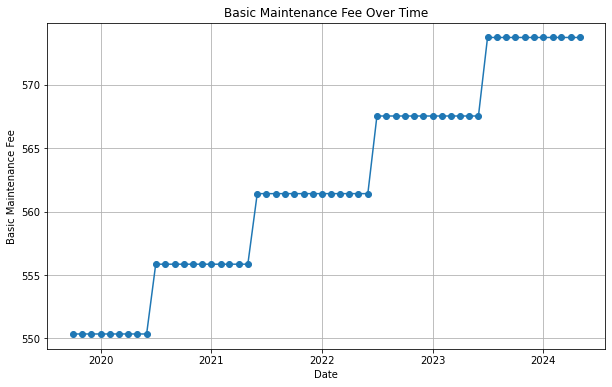

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(fees['Date'], fees['Basic maintenance fee'], marker='o')
plt.title('Basic Maintenance Fee Over Time')
plt.xlabel('Date')
plt.ylabel('Basic Maintenance Fee')
plt.grid(True)
plt.show()

Mean Squared Error: 7.859368156047548
R^2 Score: 0.8917445467832268


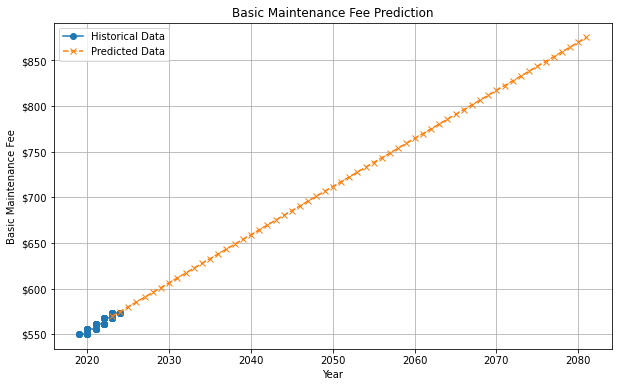

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Extract year from date
fees['Year'] = fees['Date'].dt.year

# Prepare the features and target variable
X = fees[['Year']]
y = fees['Basic maintenance fee']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set to evaluate the model
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")

# Create a DataFrame with future years
future_years = pd.DataFrame({'Year': np.arange(2023, 2082)})

# Predict the basic maintenance fee for future years
future_fees = model.predict(future_years)

# Combine the years and predictions into a DataFrame
future_df = pd.DataFrame({'Year': future_years['Year'], 'Predicted Basic Maintenance Fee': future_fees})

# Function to format y-axis labels as dollars
def dollar_format(x, pos):
    return f'${x:,.0f}'

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(fees['Year'], fees['Basic maintenance fee'], marker='o', label='Historical Data')
plt.plot(future_df['Year'], future_df['Predicted Basic Maintenance Fee'], marker='x', linestyle='--', label='Predicted Data')
plt.title('Basic Maintenance Fee Prediction')
plt.xlabel('Year')
plt.ylabel('Basic Maintenance Fee')
plt.legend()
plt.grid(True)

# Apply the dollar format to the y-axis
formatter = FuncFormatter(dollar_format)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

"Mean Squared Error: 7.859368156047548" means that, on average, the squared difference between the actual "Basic maintenance fee" values and the predicted values is approximately 7.86. This is a measure of the average error in the units of the "Basic maintenance fee" squared.

"R^2 Score: 0.8917445467832268" means that approximately 89.17% of the variance in the "Basic maintenance fee" can be explained by the "Year" using your linear regression model. This indicates a strong relationship between the year and the basic maintenance fee, meaning your model fits the data well.

Below, is a different visualization using bokeh where we can hover on it, and the values will appear

In [14]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from bokeh.plotting import figure, show
from bokeh.models import HoverTool

# Extract year from date
fees['Year'] = fees['Date'].dt.year

# Prepare the features and target variable
X = fees[['Year']]
y = fees['Basic maintenance fee']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set to evaluate the model
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")

# Create a dataframe with future years
future_years = pd.DataFrame({'Year': np.arange(2023, 2082)})

# Predict the basic maintenance fee for future years
future_fees = model.predict(future_years)

# Combine the years and predictions into a DataFrame
future_df = pd.DataFrame({'Year': future_years['Year'], 'Predicted Basic Maintenance Fee': future_fees})

# Visualize the results using Bokeh
p = figure(title="Basic Maintenance Fee Prediction", x_axis_label='Year', y_axis_label='Basic Maintenance Fee')

# Historical Data
p.circle(fees['Year'], fees['Basic maintenance fee'], legend_label='Historical Data', fill_color="blue", size=8)

# Predicted Data
p.cross(future_df['Year'], future_df['Predicted Basic Maintenance Fee'], legend_label='Predicted Data', color="red", size=10)

# Add hover tool
hover = HoverTool(tooltips=[("Year", "@x"), ("Predicted Basic Maintenance Fee", "@y")])
p.add_tools(hover)

# Show the plot
show(p)

Mean Squared Error: 7.859368156047548
R^2 Score: 0.8917445467832268
